In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [75]:
df = pd.read_csv('../data/division_offences_by_seifa_indexes.csv')
df.describe()

,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population,Violent_DV_Crime,log_vdv_crime,scaled_log_vdv_violence
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,759.515031,2585.527809,586.214224,203.183071,1837.937345,5972.377480,936.728565,3.431416,924.438225,3.480088,943.061120,2.965074,920.516045,3.295133,5945.964602,962.698102,6.534636,-0.101612
std,720.359716,3182.555893,583.004907,232.079277,1557.563931,5675.094658,107.181988,2.499055,86.307256,2.787401,99.583605,2.225093,80.049524,2.848629,6552.719918,935.703319,0.792799,0.878373
min,85.700758,271.721959,25.276461,25.443511,244.535519,718.579235,492.476114,1.000000,658.673564,1.000000,509.381303,1.000000,758.922157,1.000000,487.000000,112.689394,4.733470,-2.097193
25%,318.495980,889.183882,227.044286,70.146967,896.906536,2632.546429,888.529999,1.000000,873.683447,1.000000,911.572209,1.000000,865.404639,1.000000,1188.000000,406.404866,6.009801,-0.683097
50%,500.098276,1546.928780,457.875173,130.871086,1399.872432,4065.617261,954.228299,3.000000,923.027495,2.000000,947.683514,2.000000,901.361503,2.000000,3180.000000,613.545032,6.420882,-0.227644
75%,859.570080,3273.064390,696.961115,220.898982,2184.018679,7496.468159,1008.749203,5.000000,980.442381,5.000000,1004.775029,4.000000,966.519640,5.000000,8842.750000,1091.419447,6.996147,0.409714
max,3945.641987,27694.001874,4224.929709,1437.185930,11090.909091,47652.764761,1104.983298,10.000000,1142.701375,10.000000,1109.376117,10.000000,1151.337505,10.000000,37951.000000,5214.686623,8.559426,2.141731


In [90]:
# Step 1: Prepare data (using X_scaled and y as example)
X = df[['IER Score', 'IEO Score']].values
y = df['scaled_log_vdv_violence'].values

In [91]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [93]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [94]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout = nn.Dropout(0.3)  # Dropout rate = 30%
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)   # Applies dropout during training only
        x = self.fc2(x)
        return x

# Create model
input_size = X_train.shape[1]  # Number of features in your dataset
model = SimpleNN(input_size)


In [95]:
# Step 3: Train the model
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-4)  # Adam optimizer with weight decay

Epoch 1/150 | Train Loss: 0.9721 | Val Loss: 0.7402
Epoch 2/150 | Train Loss: 0.8564 | Val Loss: 1.0988
Epoch 3/150 | Train Loss: 0.8532 | Val Loss: 0.6851
Epoch 4/150 | Train Loss: 0.6169 | Val Loss: 0.6066
Epoch 5/150 | Train Loss: 0.5493 | Val Loss: 0.6091
Epoch 6/150 | Train Loss: 0.5629 | Val Loss: 0.7142
Epoch 7/150 | Train Loss: 0.5615 | Val Loss: 0.5597
Epoch 8/150 | Train Loss: 0.5485 | Val Loss: 0.6136
Epoch 9/150 | Train Loss: 0.5212 | Val Loss: 0.8702
Epoch 10/150 | Train Loss: 0.5987 | Val Loss: 0.7322
Epoch 11/150 | Train Loss: 0.5830 | Val Loss: 0.5780
Epoch 12/150 | Train Loss: 0.5919 | Val Loss: 0.7794
Epoch 13/150 | Train Loss: 0.5882 | Val Loss: 0.8058
Epoch 14/150 | Train Loss: 0.5689 | Val Loss: 0.5976
Epoch 15/150 | Train Loss: 0.5430 | Val Loss: 0.6901
Epoch 16/150 | Train Loss: 0.5467 | Val Loss: 0.6574
Epoch 17/150 | Train Loss: 0.5298 | Val Loss: 0.7040
Epoch 18/150 | Train Loss: 0.5428 | Val Loss: 0.7687
Epoch 19/150 | Train Loss: 0.5306 | Val Loss: 0.6417
Ep

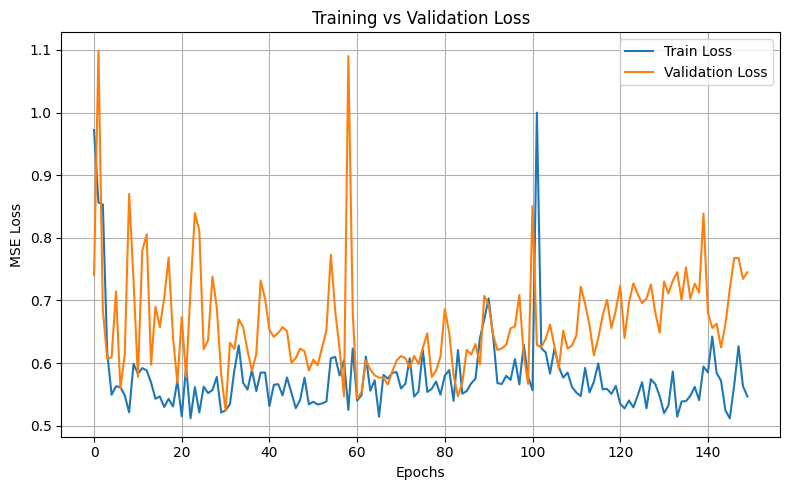

In [96]:
# Initialize lists to store losses
train_losses = []
val_losses = []

# Number of epochs
n_epochs = 150
for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_outputs = model(val_X)
            loss = criterion(val_outputs.squeeze(), val_y)
            val_loss += loss.item() * val_X.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# Plotting the loss curves
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

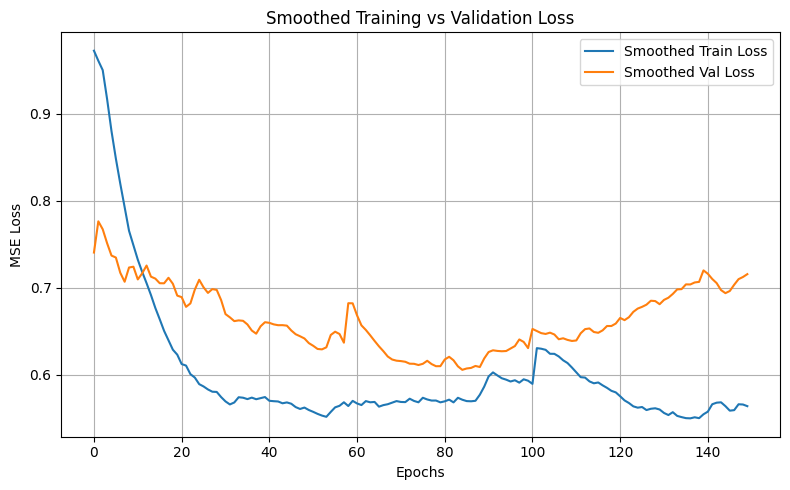

In [98]:
# Apply smoothing
smoothed_train = smooth_curve(train_losses, factor=0.9)
smoothed_val = smooth_curve(val_losses, factor=0.9)

# Plot
plt.figure(figsize=(8,5))
plt.plot(smoothed_train, label='Smoothed Train Loss')
plt.plot(smoothed_val, label='Smoothed Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Smoothed Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()